# Taiwan Housing Price Analysis

**Author:** Tshembani Mathebula  
**Date:** August 2025  
**Project:** Data Analysis & Machine Learning

---

## Introduction
This project analyzes housing prices in Taiwan using a public dataset. The goals are:
1. Explore and visualize the dataset.
2. Preprocess and clean the data.
3. Build predictive Linear Regression model to estimate house prices per unit area.
4. Evaluate model performance and provide actionable insights.

In [2]:
# Numerical data analysis libraries
import numpy as np
import pandas as pd
import datetime

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model training libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## EXPLORATORY DATA ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
# Remove Property ID and rename columns
df.drop('No', axis=1, inplace=True)
renamed_columns = ['Transaction Date', 'House Age', 'Distance To The Nearest MRT Station', 
                   'Number Of Convenience Stores', 'Lat', 'Long', 'Price/Unit Area']
df.columns = renamed_columns
df

,Transaction Date,House Age,Distance To The Nearest MRT Station,Number Of Convenience Stores,Lat,Long,Price/Unit Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [8]:
df.dtypes

Transaction Date                       float64
House Age                              float64
Distance To The Nearest MRT Station    float64
Number Of Convenience Stores             int64
Lat                                    float64
Long                                   float64
Price/Unit Area                        float64
dtype: object

In [9]:
correlation = df.corr()
correlation['Price/Unit Area'].sort_values(ascending=False)

Price/Unit Area                        1.000000
Number Of Convenience Stores           0.571005
Lat                                    0.546307
Long                                   0.523287
Transaction Date                       0.087491
House Age                             -0.210567
Distance To The Nearest MRT Station   -0.673613
Name: Price/Unit Area, dtype: float64

## Data Visualisation

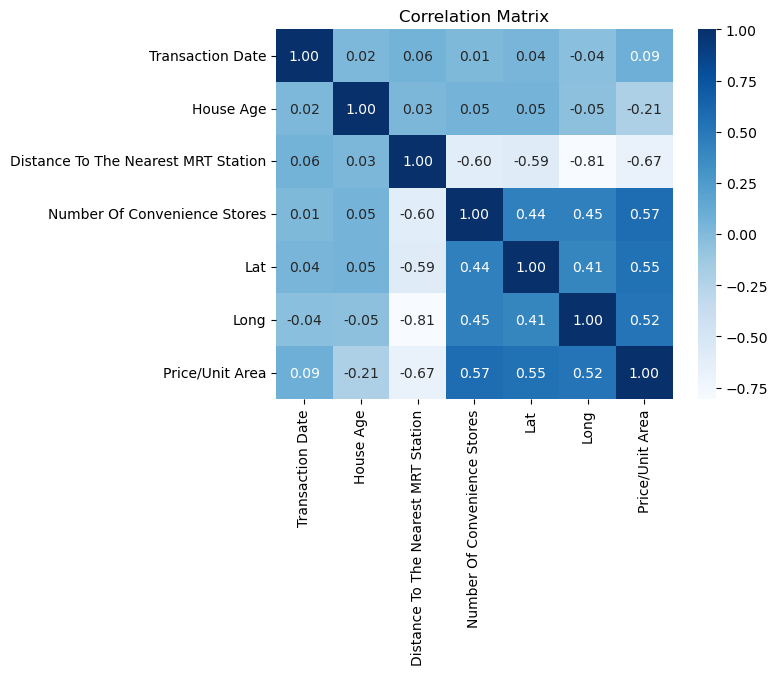

In [10]:
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

`We will be using the days post purchase as our basis, calculating it all the way to the latest purchase on the data set.`

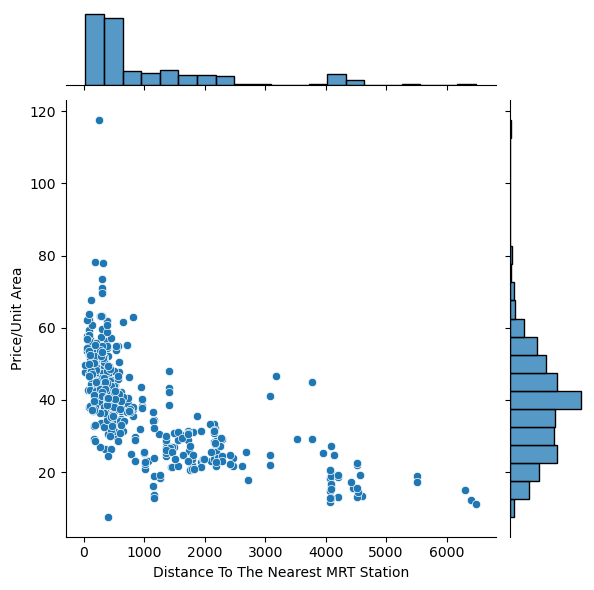

In [12]:
sns.jointplot(x='Distance To The Nearest MRT Station', y='Price/Unit Area', data=df)

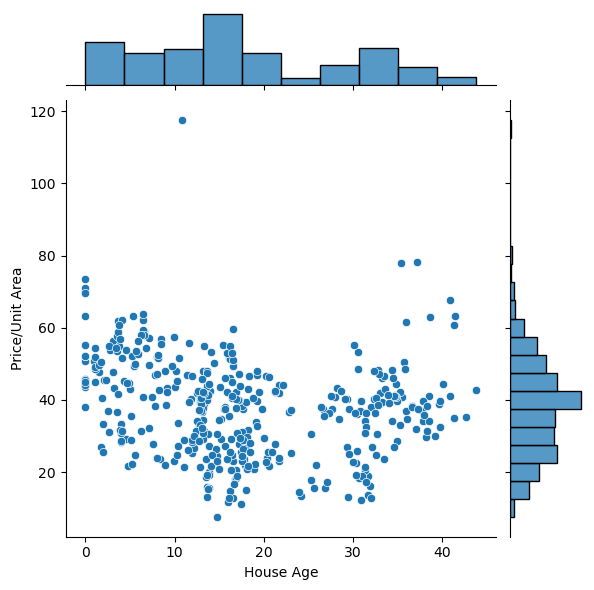

In [13]:
sns.jointplot(x='House Age', y='Price/Unit Area', data=df)

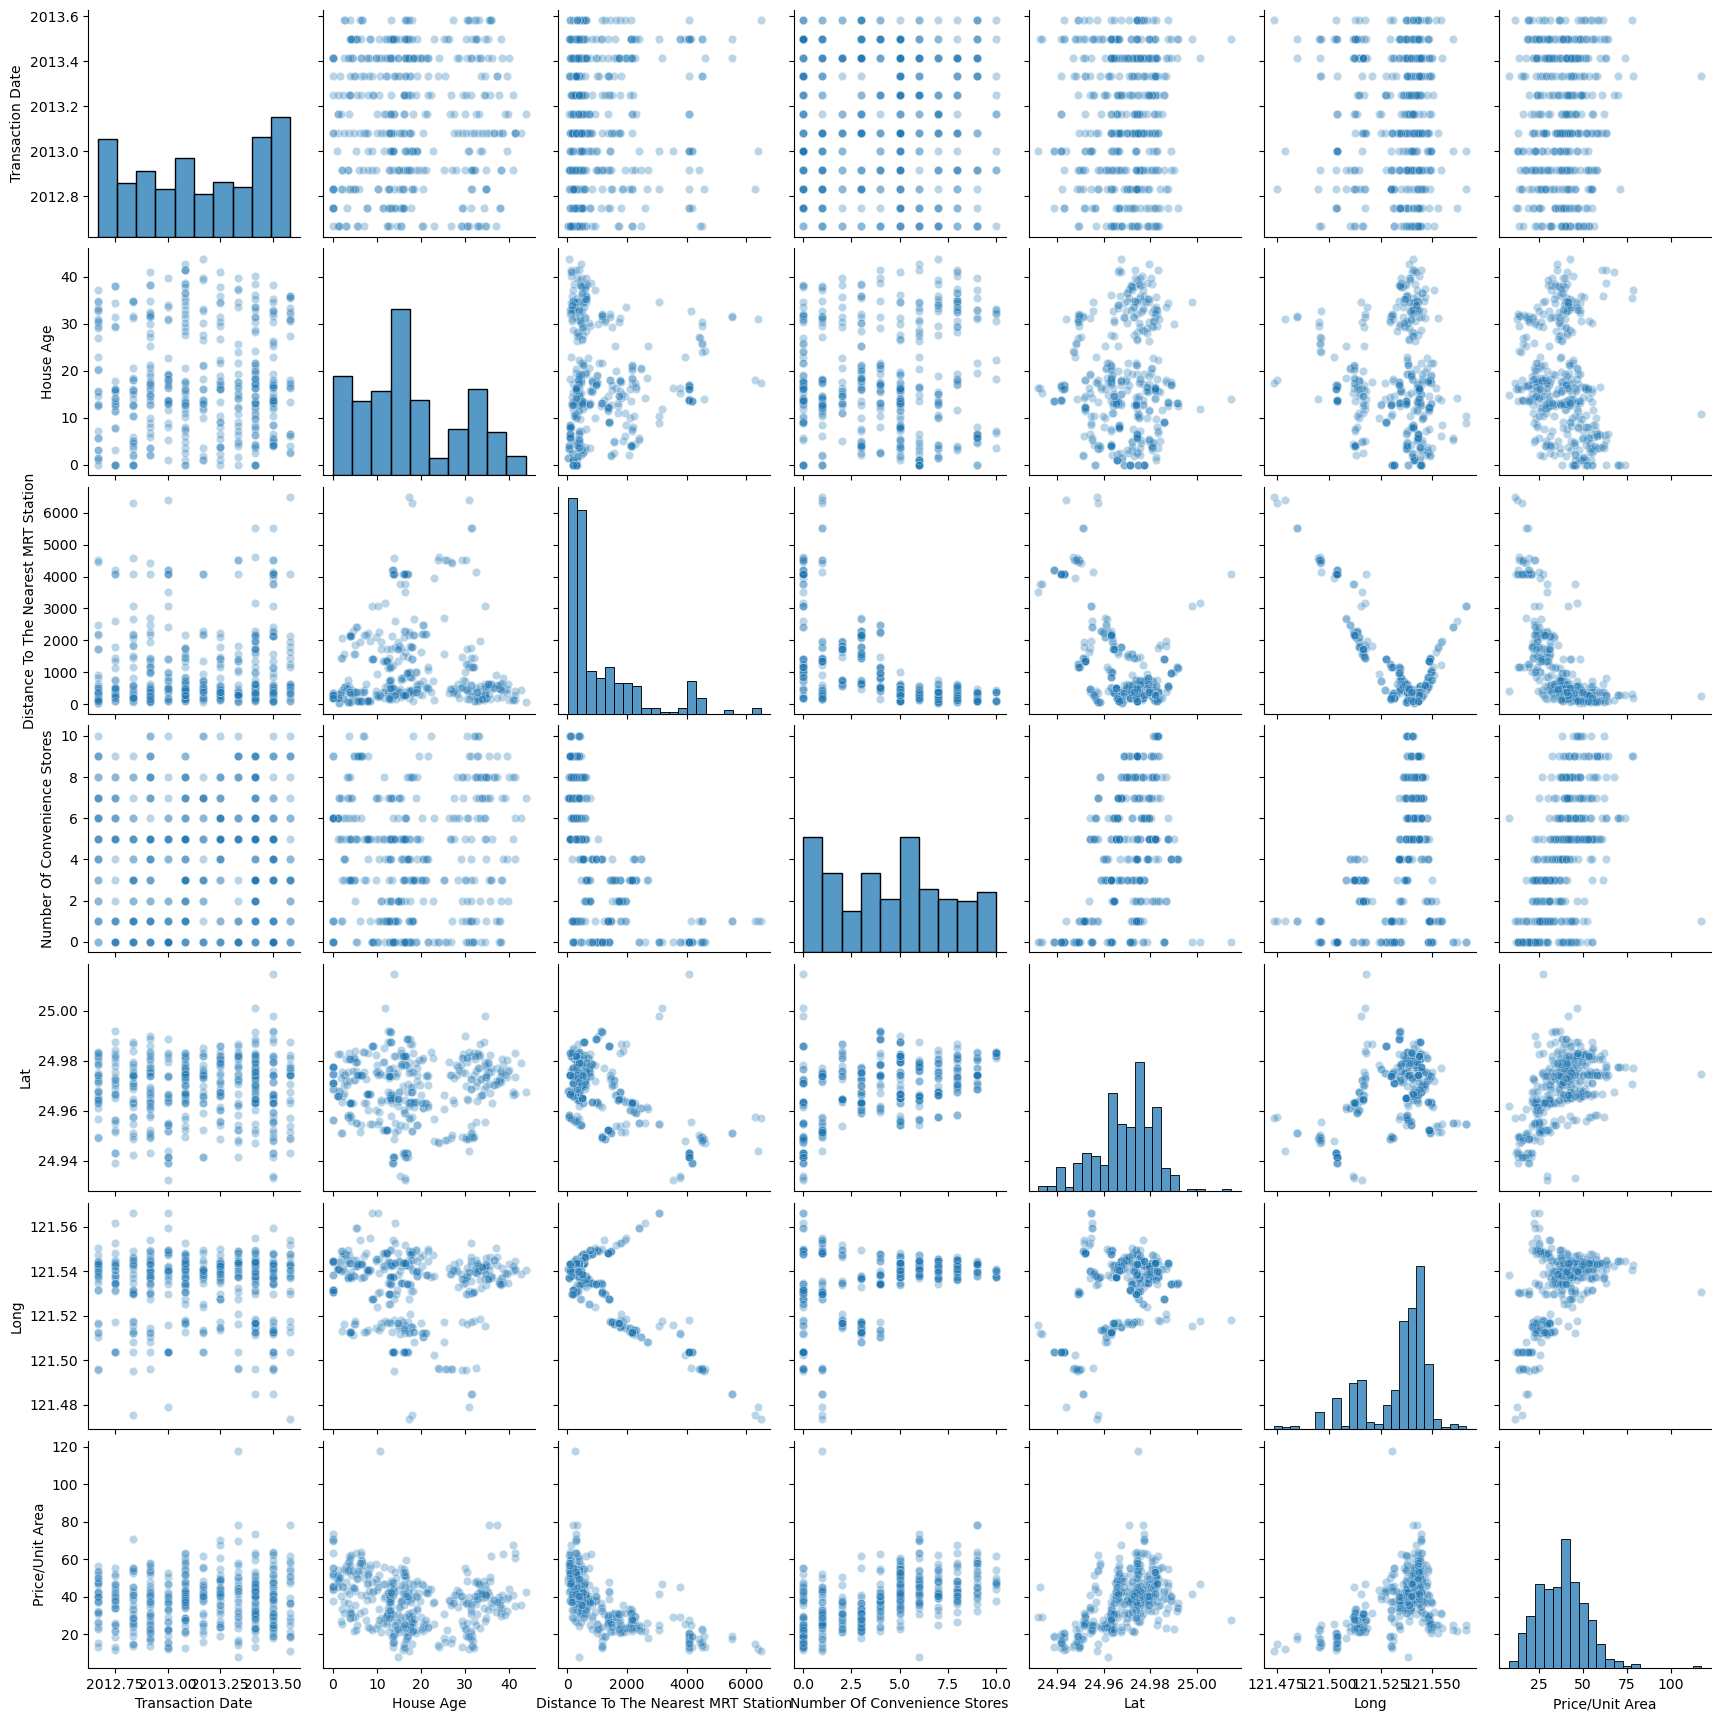

In [14]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.3})
plt.show()

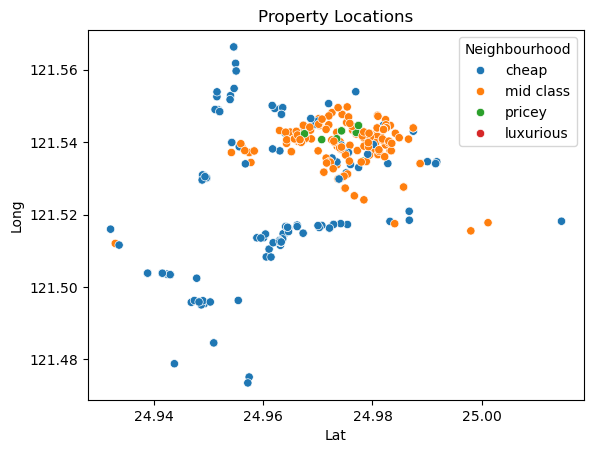

In [15]:
labels = ["cheap", "mid class", "pricey", "luxurious"]
df["Neighbourhood"] = pd.cut(df["Price/Unit Area"], bins=4, labels=labels)
sns.scatterplot(x="Lat", y="Long", hue="Neighbourhood", data=df)
plt.title('Property Locations')
plt.show()

In [16]:
df.drop(columns=['Neighbourhood'], inplace=True)

### Feature Engineering

We are breaking down the transaction date column into year, month and day using the float date given

In [18]:
# Step 1: Create 'Transaction Date' column
df['Year'] = df['Transaction Date'].apply(lambda x: int(x))
df['Month'] = df['Transaction Date'].apply(lambda x: int((x - int(x)) * 12) + 1)
df['Transaction_Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Step 2: Drop the original and helper columns (but NOT 'Transaction Date')
df.drop(['Transaction Date', 'Year', 'Month'], axis=1, inplace=True)

# Step 3: Move 'Transaction Date' to the first column
df.insert(0, 'Transaction_Date', df.pop('Transaction_Date'))
df

,Transaction_Date,House Age,Distance To The Nearest MRT Station,Number Of Convenience Stores,Lat,Long,Price/Unit Area
0,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-07-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-01,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-09-01,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-01,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


In [19]:
df['Transaction_Date'].value_counts().sort_values(ascending=False).head()

Transaction_Date
2013-01-01    74
2013-07-01    70
2013-04-01    61
2012-10-01    58
2013-06-01    58
Name: count, dtype: int64

In [20]:
df['Days Post Purchase'] = df['Transaction_Date'].max() - df['Transaction_Date'] # reference is last date of purchase
df['Days Post Purchase'] = df['Days Post Purchase'].dt.days
df.insert(1, 'Days Post Purchase', df.pop('Days Post Purchase'))
df

,Transaction_Date,Days Post Purchase,House Age,Distance To The Nearest MRT Station,Number Of Convenience Stores,Lat,Long,Price/Unit Area
0,2012-12-01,212,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-12-01,212,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-07-01,0,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-01,0,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-01,273,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,2013-01-01,181,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-09-01,303,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-01,91,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,181,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
df.drop(columns=['Transaction_Date'], axis=1, inplace=True)
df

,Days Post Purchase,House Age,Distance To The Nearest MRT Station,Number Of Convenience Stores,Lat,Long,Price/Unit Area
0,212,32.0,84.87882,10,24.98298,121.54024,37.9
1,212,19.5,306.59470,9,24.98034,121.53951,42.2
2,0,13.3,561.98450,5,24.98746,121.54391,47.3
3,0,13.3,561.98450,5,24.98746,121.54391,54.8
4,273,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,181,13.7,4082.01500,0,24.94155,121.50381,15.4
410,303,5.6,90.45606,9,24.97433,121.54310,50.0
411,91,18.8,390.96960,7,24.97923,121.53986,40.6
412,181,8.1,104.81010,5,24.96674,121.54067,52.5


## Preprocessing

In [23]:
X = df.drop('Price/Unit Area', axis=1)
y = df['Price/Unit Area']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[ 0.73014755  1.25562833 -0.79249504  2.00740743  1.12542986  0.44876222]
 [ 0.73014755  0.15708622 -0.61661163  1.66750286  0.91244418  0.40113894]
 [-1.3335368  -0.38779067 -0.41401527  0.30788458  1.48686011  0.68818339]
 ...
 [-0.44771003  0.09556786 -0.54967846  0.98769372  0.82289338  0.42397202]
 [ 0.42838239 -0.84478419 -0.77668389  0.30788458 -0.18475479  0.4768143 ]
 [-1.3335368  -0.98539758 -0.78807071  1.66750286  0.42757905  0.63534112]]


In [26]:
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df['Price/Unit Area'] = y.values
scaled_df

,Days Post Purchase,House Age,Distance To The Nearest MRT Station,Number Of Convenience Stores,Lat,Long,Price/Unit Area
0,0.730148,1.255628,-0.792495,2.007407,1.125430,0.448762,37.9
1,0.730148,0.157086,-0.616612,1.667503,0.912444,0.401139,42.2
2,-1.333537,-0.387791,-0.414015,0.307885,1.486860,0.688183,47.3
3,-1.333537,-0.387791,-0.414015,0.307885,1.486860,0.688183,54.8
4,1.323944,-1.117223,-0.549997,0.307885,0.834188,0.592937,43.1
...,...,...,...,...,...,...,...
409,0.428382,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,15.4
410,1.615974,-1.064493,-0.788071,1.667503,0.427579,0.635341,50.0
411,-0.447710,0.095568,-0.549678,0.987694,0.822893,0.423972,40.6
412,0.428382,-0.844784,-0.776684,0.307885,-0.184755,0.476814,52.5


## Machine Learning

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
print(f"mse is {mean_squared_error(y_test, y_pred):.2f}")
print(f"rmse is {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"r2 is {r2_score(y_test, y_pred):.2f}")

mse is 53.89
rmse is 7.34
r2 is 0.68


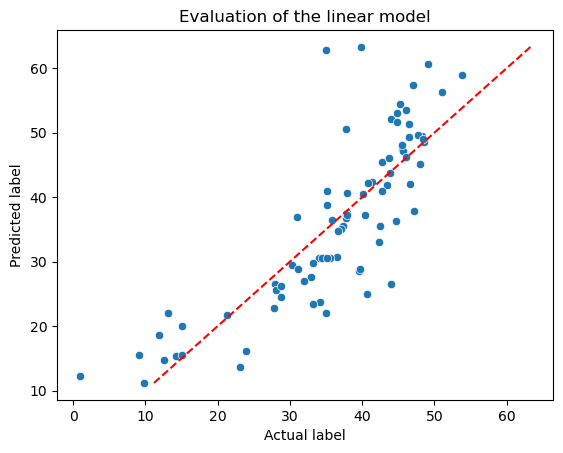

In [31]:
sns.scatterplot(x=y_pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Reference line
plt.title('Evaluation of the linear model')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()